In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as plty
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,classification_report,mean_squared_error,roc_curve,confusion_matrix
from sklearn.feature_selection import f_classif,chi2
import warnings
warnings.filterwarnings("ignore")

1.loading the datasets

In [2]:
df=pd.read_csv(r"C:\Users\USER\Documents\heart_disease.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0


In [5]:
df.shape

(999, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    float64
dtypes: float64(6), object(7)
memory usage: 101.6+ KB


2.Exploratory data analysis

In [7]:
df.isnull().sum()

age          91
sex          91
cp           91
trestbps     91
chol         91
fbs          91
restecg      91
thalch       91
exang        91
oldpeak     153
slope        91
thal         91
num          91
dtype: int64

In [214]:
from sklearn.impute import SimpleImputer

num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_cols = ['sex', 'fbs', 'exang']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [215]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,51.0,Male,asymptomatic,110.0,37.5,True,normal,92.0,FALSE,0.0,flat,reversable defect,4.0
841,62.0,Male,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,TRUE,3.0,flat,reversable defect,4.0
842,53.0,Male,asymptomatic,125.0,37.5,False,normal,120.0,FALSE,1.5,upsloping,reversable defect,4.0
843,62.0,Male,asymptomatic,166.0,170.0,False,st-t abnormality,120.0,TRUE,3.0,flat,normal,4.0


In [216]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [217]:
df.duplicated().sum()

np.int64(0)

In [218]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [219]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
840,51.0,Male,asymptomatic,110.0,37.5,True,normal,92.0,FALSE,0.0,flat,reversable defect,4.0
841,62.0,Male,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,TRUE,3.0,flat,reversable defect,4.0
842,53.0,Male,asymptomatic,125.0,37.5,False,normal,120.0,FALSE,1.5,upsloping,reversable defect,4.0
843,62.0,Male,asymptomatic,166.0,170.0,False,st-t abnormality,120.0,TRUE,3.0,flat,normal,4.0


In [220]:
df.duplicated().sum()

np.int64(0)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       845 non-null    float64
 1   sex       845 non-null    object 
 2   cp        845 non-null    object 
 3   trestbps  845 non-null    float64
 4   chol      845 non-null    float64
 5   fbs       845 non-null    object 
 6   restecg   845 non-null    object 
 7   thalch    845 non-null    float64
 8   exang     845 non-null    object 
 9   oldpeak   845 non-null    float64
 10  slope     845 non-null    object 
 11  thal      845 non-null    object 
 12  num       845 non-null    float64
dtypes: float64(6), object(7)
memory usage: 85.9+ KB


In [222]:
df.describe

<bound method NDFrame.describe of       age   sex               cp  trestbps   chol    fbs           restecg  \
0    63.0  Male   typical angina     145.0  233.0   True    lv hypertrophy   
1    41.0  Male  atypical angina     135.0  203.0  False            normal   
2    57.0  Male     asymptomatic     140.0  192.0  False            normal   
3    52.0  Male   typical angina     118.0  186.0  False    lv hypertrophy   
4    57.0  Male     asymptomatic     110.0  201.0  False            normal   
..    ...   ...              ...       ...    ...    ...               ...   
840  51.0  Male     asymptomatic     110.0   37.5   True            normal   
841  62.0  Male     asymptomatic     160.0  254.0   True  st-t abnormality   
842  53.0  Male     asymptomatic     125.0   37.5  False            normal   
843  62.0  Male     asymptomatic     166.0  170.0  False  st-t abnormality   
844  56.0  Male      non-anginal     170.0   37.5  False    lv hypertrophy   

     thalch  exang  oldpeak  

In [223]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,53.420118,132.100592,208.398817,137.201183,0.881893,0.978698
std,9.103269,17.570321,96.185960,25.584397,1.057176,1.128905
min,29.000000,90.000000,37.500000,66.000000,-2.250000,0.000000
25%,47.000000,120.000000,177.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,225.000000,140.000000,0.500000,1.000000
75%,60.000000,140.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,170.000000,409.500000,202.000000,3.750000,4.000000


In [224]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [225]:
df.age.value_counts()

age
54.0    48
58.0    39
57.0    37
55.0    36
52.0    35
59.0    35
56.0    35
53.0    32
48.0    30
62.0    30
51.0    30
60.0    29
61.0    28
63.0    26
50.0    24
46.0    24
41.0    24
43.0    24
49.0    21
64.0    20
44.0    19
47.0    19
42.0    18
45.0    17
65.0    16
39.0    15
38.0    15
67.0    14
40.0    13
66.0    13
37.0    11
68.0     9
69.0     8
35.0     7
70.0     7
36.0     6
74.0     5
71.0     4
34.0     4
72.0     3
75.0     3
32.0     2
76.0     2
77.0     2
31.0     2
30.0     1
29.0     1
33.0     1
73.0     1
Name: count, dtype: int64

In [226]:
df.sex.value_counts()

sex
Male      656
Female    189
Name: count, dtype: int64

In [227]:
df.cp.value_counts()

cp
asymptomatic       464
non-anginal        183
atypical angina    158
typical angina      40
Name: count, dtype: int64

In [228]:
df.trestbps.value_counts()

trestbps
120.0    128
130.0    113
140.0    100
110.0     57
150.0     53
160.0     49
170.0     42
125.0     28
115.0     19
135.0     18
128.0     17
100.0     15
145.0     15
138.0     15
112.0     13
122.0     12
124.0     12
132.0     12
118.0     10
142.0      9
134.0      9
105.0      8
136.0      8
108.0      7
126.0      7
152.0      7
155.0      7
144.0      6
95.0       5
158.0      4
146.0      3
102.0      3
104.0      3
154.0      3
106.0      3
148.0      2
156.0      2
114.0      2
165.0      2
94.0       2
90.0       2
116.0      2
129.0      1
101.0      1
113.0      1
96.0       1
92.0       1
117.0      1
127.0      1
167.0      1
164.0      1
123.0      1
166.0      1
Name: count, dtype: int64

In [229]:
df.chol.value_counts()

chol
37.5     157
409.5     15
254.0      9
220.0      9
223.0      9
        ... 
374.0      1
337.0      1
174.0      1
407.0      1
109.0      1
Name: count, Length: 205, dtype: int64

In [230]:
df.fbs.value_counts()

fbs
False    687
True     158
Name: count, dtype: int64

In [231]:
df.restecg.value_counts()

restecg
normal              520
lv hypertrophy      180
st-t abnormality    145
Name: count, dtype: int64

In [232]:
df.thalch.value_counts()

thalch
140.0    41
150.0    40
120.0    34
130.0    29
160.0    24
         ..
104.0     1
70.0      1
78.0      1
77.0      1
73.0      1
Name: count, Length: 117, dtype: int64

In [233]:
df.exang.value_counts()

exang
FALSE    513
TRUE     332
Name: count, dtype: int64

In [234]:
df.oldpeak.value_counts()

oldpeak
 0.00    357
 1.00     83
 2.00     76
 1.50     48
 3.00     28
 0.50     19
 1.20     17
 2.50     16
 3.75     15
 0.80     15
 1.40     15
 1.60     14
 0.60     14
 0.20     14
 1.80     12
 0.40     10
 0.10      9
 2.80      7
 2.60      7
 0.70      5
 2.20      5
 1.90      5
 0.30      5
 1.30      5
 0.90      4
 1.10      4
 2.40      4
 3.60      4
 3.40      3
 3.50      2
 2.30      2
-1.00      2
 3.20      2
 2.10      2
-0.50      2
 1.70      2
-1.10      1
-0.10      1
 3.10      1
-2.25      1
-0.90      1
-1.50      1
-0.80      1
-2.00      1
-0.70      1
 2.90      1
 3.70      1
Name: count, dtype: int64

In [235]:
df.slope.value_counts()

slope
flat           425
upsloping      276
downsloping    144
Name: count, dtype: int64

In [236]:
df.thal.value_counts()

thal
normal               347
reversable defect    330
fixed defect         168
Name: count, dtype: int64

In [237]:
df.num.value_counts()

num
0.0    378
1.0    250
2.0    100
3.0     91
4.0     26
Name: count, dtype: int64

<Axes: >

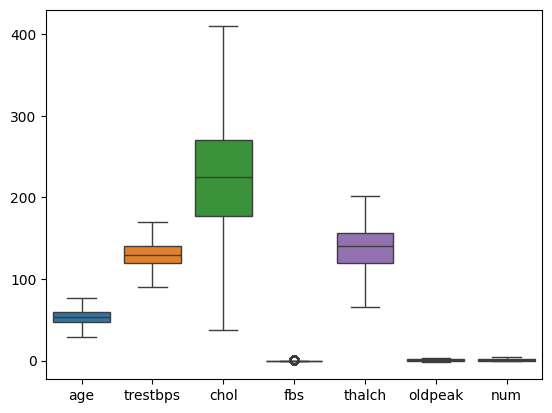

In [238]:
sns.boxplot(df)

In [239]:
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extream=q1-1.5*iqr
    upper_extream=q3+1.5*iqr
    df[column]=df[column].apply(lambda x:lower_extream if x<lower_extream else upper_extream if x>upper_extream else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)

<Axes: >

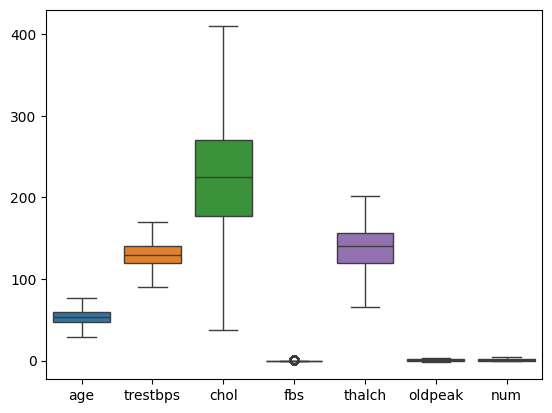

In [240]:
sns.boxplot(df)

In [241]:
dfs=df[["fbs"]]

In [242]:
#data distribution in numerical columns

In [243]:
df.select_dtypes(include="number")

,age,trestbps,chol,thalch,oldpeak,num
0,63.0,145.0,233.0,150.0,2.3,0.0
1,41.0,135.0,203.0,132.0,0.0,0.0
2,57.0,140.0,192.0,148.0,0.4,0.0
3,52.0,118.0,186.0,190.0,0.0,0.0
4,57.0,110.0,201.0,126.0,1.5,0.0
...,...,...,...,...,...,...
840,51.0,110.0,37.5,92.0,0.0,4.0
841,62.0,160.0,254.0,108.0,3.0,4.0
842,53.0,125.0,37.5,120.0,1.5,4.0
843,62.0,166.0,170.0,120.0,3.0,4.0


In [244]:
#data distribution with numerical columns

<Axes: xlabel='age', ylabel='Count'>

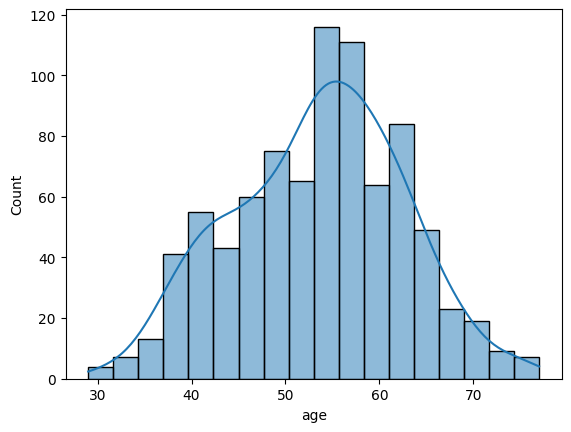

In [245]:
sns.histplot(df.age,kde=True)

<Axes: xlabel='trestbps', ylabel='Count'>

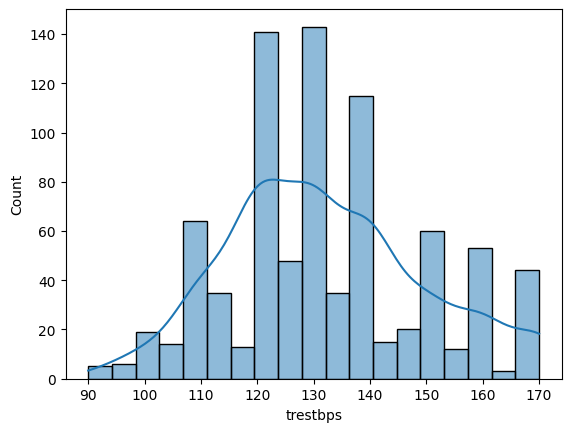

In [246]:
sns.histplot(df.trestbps,kde=True)

<Axes: xlabel='chol', ylabel='Count'>

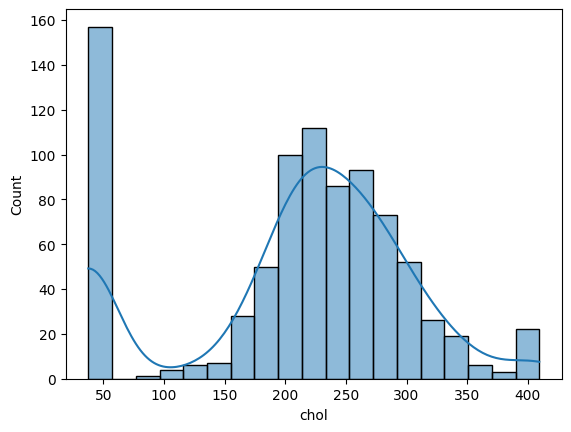

In [247]:
sns.histplot(df.chol,kde=True)

<Axes: xlabel='thalch', ylabel='Count'>

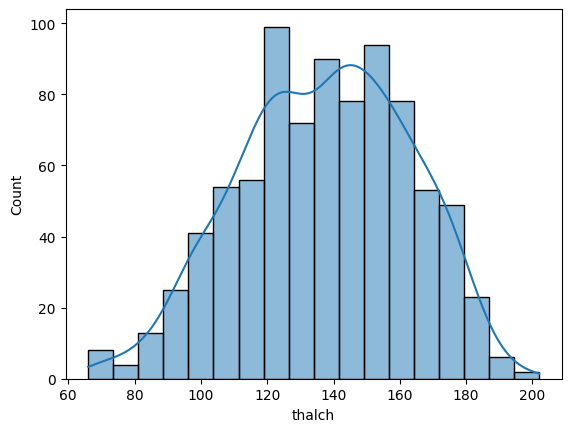

In [248]:
sns.histplot(df.thalch,kde=True)

<Axes: xlabel='oldpeak', ylabel='Count'>

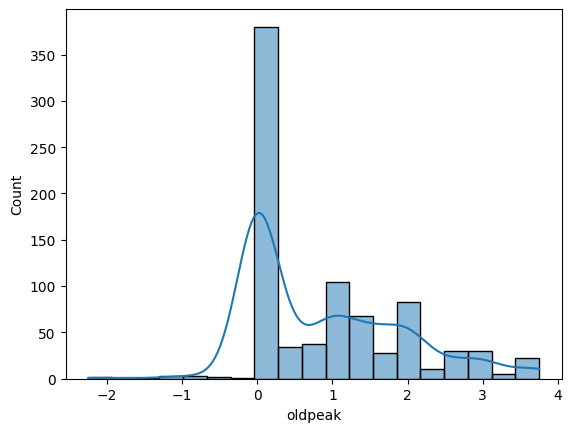

In [249]:
sns.histplot(df.oldpeak,kde=True)

<Axes: xlabel='num', ylabel='Count'>

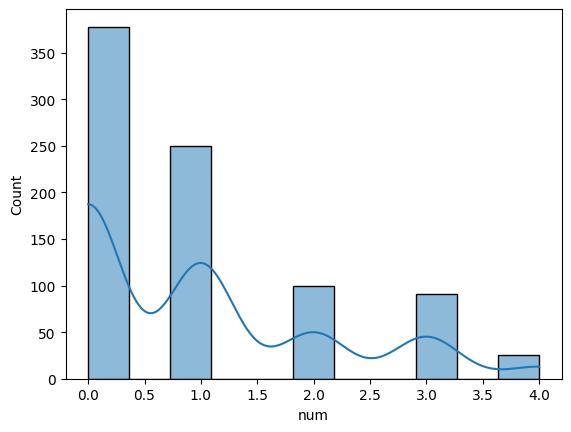

In [250]:
sns.histplot(df.num,kde=True)

In [251]:
# age wise cholestrol measures

<Axes: xlabel='age', ylabel='chol'>

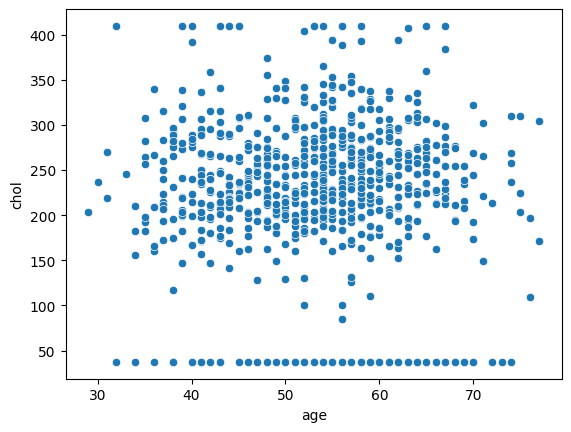

In [252]:
sns.scatterplot(x=df.age,y=df.chol)

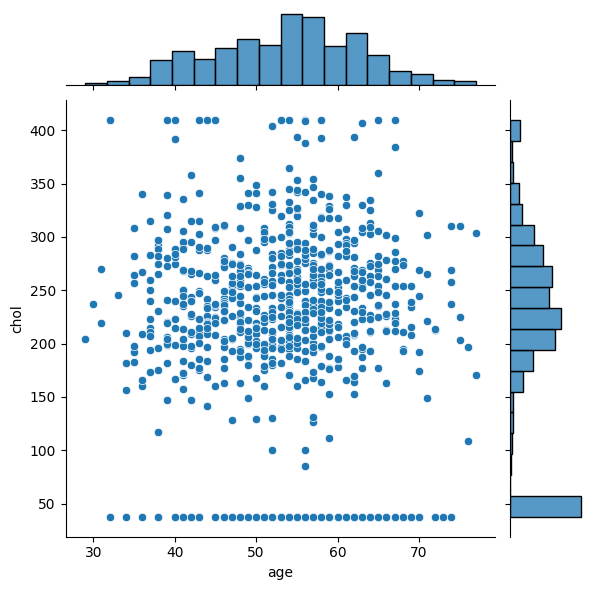

In [253]:
sns.jointplot(x=df.age,y=df.chol)

In [254]:
# measuring blood sugar by age

<Axes: xlabel='age', ylabel='oldpeak'>

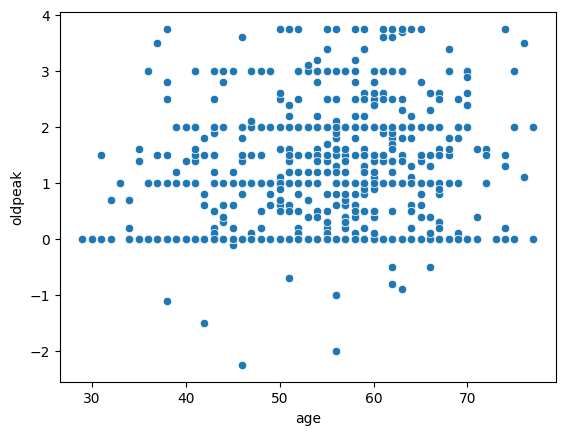

In [255]:
sns.scatterplot(x=df.age,y=df.oldpeak)

In [256]:
#checking fbs with num

<Axes: xlabel='num', ylabel='oldpeak'>

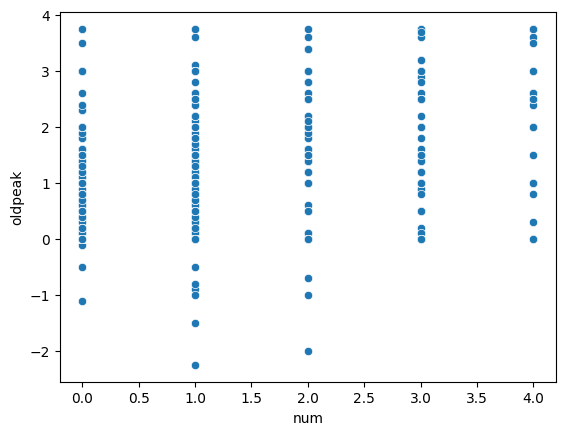

In [257]:
sns.scatterplot(x=df.num,y=df.oldpeak)

<Axes: xlabel='num', ylabel='chol'>

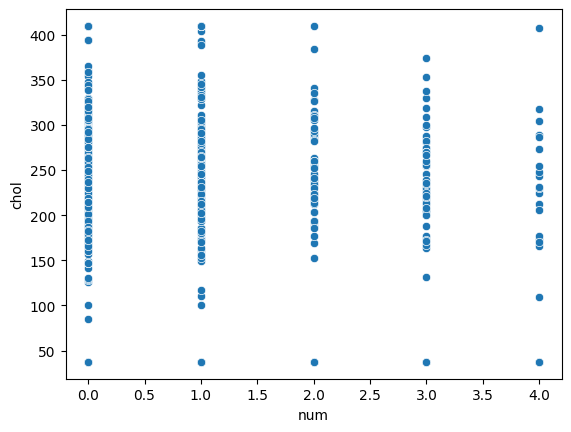

In [258]:
sns.scatterplot(x=df.num,y=df.chol)

<Axes: xlabel='age', ylabel='trestbps'>

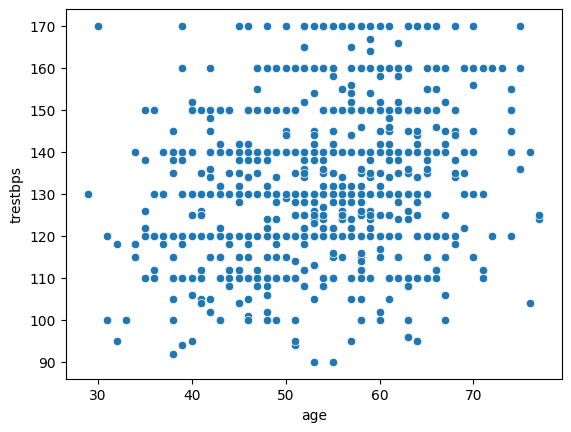

In [259]:
sns.scatterplot(x=df.age,y=df.trestbps)

In [260]:
df.select_dtypes(include="number")

,age,trestbps,chol,thalch,oldpeak,num
0,63.0,145.0,233.0,150.0,2.3,0.0
1,41.0,135.0,203.0,132.0,0.0,0.0
2,57.0,140.0,192.0,148.0,0.4,0.0
3,52.0,118.0,186.0,190.0,0.0,0.0
4,57.0,110.0,201.0,126.0,1.5,0.0
...,...,...,...,...,...,...
840,51.0,110.0,37.5,92.0,0.0,4.0
841,62.0,160.0,254.0,108.0,3.0,4.0
842,53.0,125.0,37.5,120.0,1.5,4.0
843,62.0,166.0,170.0,120.0,3.0,4.0


In [261]:
numericals=df[["age","trestbps","chol","thalch","oldpeak","num"]]

<Axes: >

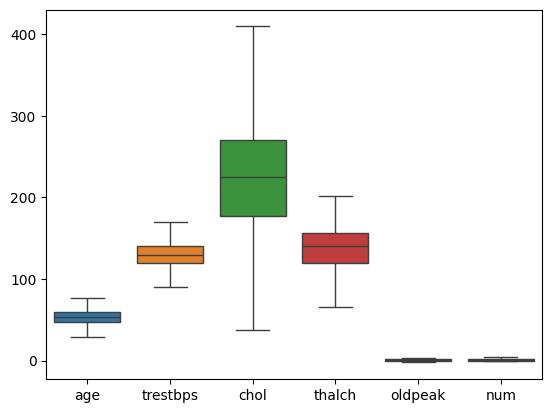

In [262]:
sns.boxplot(numericals)

In [263]:
# categorical datadistribution

In [264]:
df.select_dtypes(include="object")

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,FALSE,downsloping,fixed defect
1,Male,atypical angina,False,normal,FALSE,flat,fixed defect
2,Male,asymptomatic,False,normal,FALSE,flat,fixed defect
3,Male,typical angina,False,lv hypertrophy,FALSE,flat,fixed defect
4,Male,asymptomatic,False,normal,TRUE,flat,fixed defect
...,...,...,...,...,...,...,...
840,Male,asymptomatic,True,normal,FALSE,flat,reversable defect
841,Male,asymptomatic,True,st-t abnormality,TRUE,flat,reversable defect
842,Male,asymptomatic,False,normal,FALSE,upsloping,reversable defect
843,Male,asymptomatic,False,st-t abnormality,TRUE,flat,normal


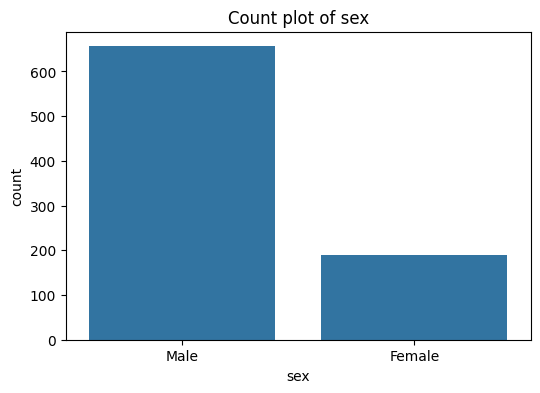

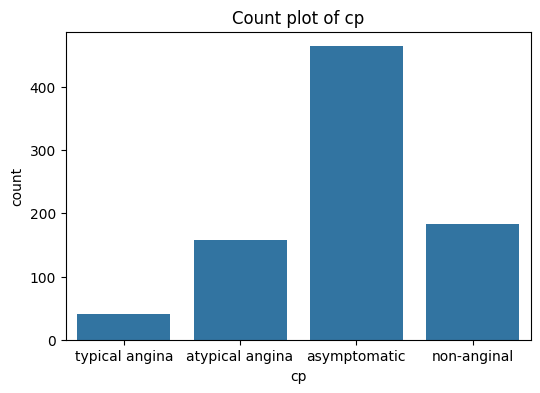

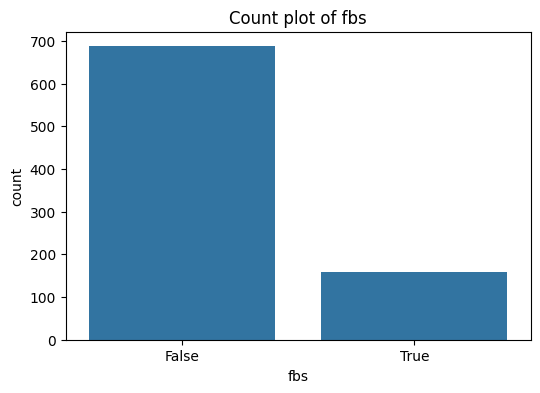

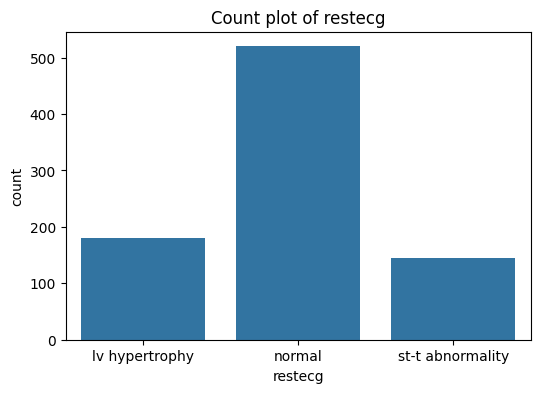

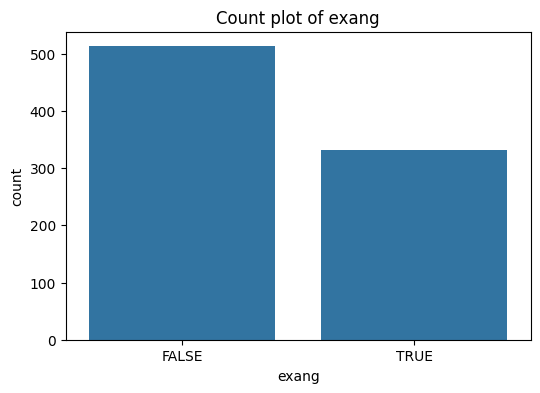

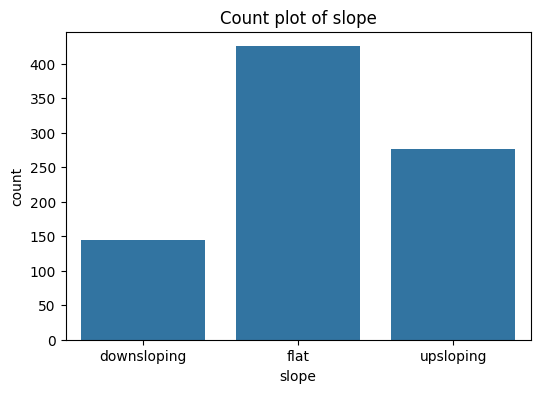

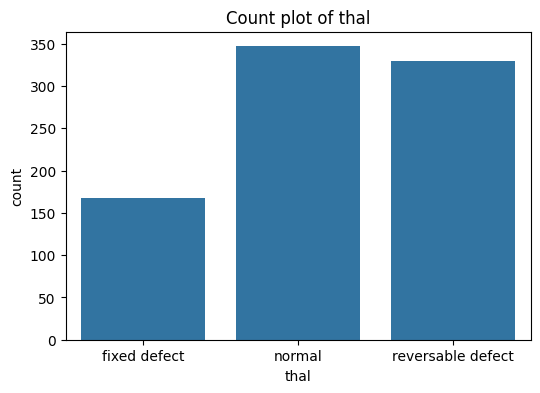

In [265]:

cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]  
cat_cols = [c for c in cat_cols if c in df.columns]
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Count plot of {col}")
    plt.show()

In [266]:
# corelation matrics
numericals.corr()

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.258537,-0.100165,-0.346069,0.246413,0.331071
trestbps,0.258537,1.000000,0.110368,-0.106424,0.177834,0.133554
chol,-0.100165,0.110368,1.000000,0.222058,0.032088,-0.246775
thalch,-0.346069,-0.106424,0.222058,1.000000,-0.143900,-0.349735
oldpeak,0.246413,0.177834,0.032088,-0.143900,1.000000,0.438931
num,0.331071,0.133554,-0.246775,-0.349735,0.438931,1.000000


<Axes: >

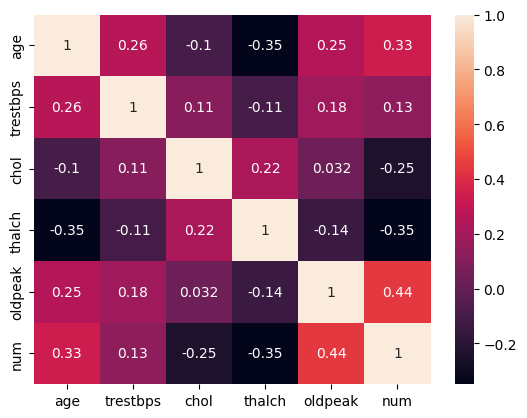

In [267]:
#to plot the heatmaps
sns.heatmap(numericals.corr(),annot=True)

3.Feature engineerings

In [268]:
targets=(df[['num']] > 0).astype(int) 

In [269]:
features=df.drop(columns="num")

In [270]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
840,51.0,Male,asymptomatic,110.0,37.5,True,normal,92.0,FALSE,0.0,flat,reversable defect
841,62.0,Male,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,TRUE,3.0,flat,reversable defect
842,53.0,Male,asymptomatic,125.0,37.5,False,normal,120.0,FALSE,1.5,upsloping,reversable defect
843,62.0,Male,asymptomatic,166.0,170.0,False,st-t abnormality,120.0,TRUE,3.0,flat,normal


In [271]:
targets

,num
0,0
1,0
2,0
3,0
4,0
...,...
840,1
841,1
842,1
843,1


In [272]:
features.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
dtype: int64

In [273]:
features.duplicated().sum()

np.int64(0)

In [274]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       845 non-null    float64
 1   sex       845 non-null    object 
 2   cp        845 non-null    object 
 3   trestbps  845 non-null    float64
 4   chol      845 non-null    float64
 5   fbs       845 non-null    object 
 6   restecg   845 non-null    object 
 7   thalch    845 non-null    float64
 8   exang     845 non-null    object 
 9   oldpeak   845 non-null    float64
 10  slope     845 non-null    object 
 11  thal      845 non-null    object 
dtypes: float64(5), object(7)
memory usage: 79.3+ KB


In [275]:
features.select_dtypes(include="object")

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,FALSE,downsloping,fixed defect
1,Male,atypical angina,False,normal,FALSE,flat,fixed defect
2,Male,asymptomatic,False,normal,FALSE,flat,fixed defect
3,Male,typical angina,False,lv hypertrophy,FALSE,flat,fixed defect
4,Male,asymptomatic,False,normal,TRUE,flat,fixed defect
...,...,...,...,...,...,...,...
840,Male,asymptomatic,True,normal,FALSE,flat,reversable defect
841,Male,asymptomatic,True,st-t abnormality,TRUE,flat,reversable defect
842,Male,asymptomatic,False,normal,FALSE,upsloping,reversable defect
843,Male,asymptomatic,False,st-t abnormality,TRUE,flat,normal


In [276]:
features.select_dtypes(include="number")

,age,trestbps,chol,thalch,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,41.0,135.0,203.0,132.0,0.0
2,57.0,140.0,192.0,148.0,0.4
3,52.0,118.0,186.0,190.0,0.0
4,57.0,110.0,201.0,126.0,1.5
...,...,...,...,...,...
840,51.0,110.0,37.5,92.0,0.0
841,62.0,160.0,254.0,108.0,3.0
842,53.0,125.0,37.5,120.0,1.5
843,62.0,166.0,170.0,120.0,3.0


3.Feature engineering

In [277]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect
...,...,...,...,...,...,...,...,...,...,...,...,...
840,51.0,Male,asymptomatic,110.0,37.5,True,normal,92.0,FALSE,0.0,flat,reversable defect
841,62.0,Male,asymptomatic,160.0,254.0,True,st-t abnormality,108.0,TRUE,3.0,flat,reversable defect
842,53.0,Male,asymptomatic,125.0,37.5,False,normal,120.0,FALSE,1.5,upsloping,reversable defect
843,62.0,Male,asymptomatic,166.0,170.0,False,st-t abnormality,120.0,TRUE,3.0,flat,normal


In [278]:
labels=LabelEncoder()

In [279]:
for col in features[["sex","cp","fbs","restecg","exang","slope","thal"]]:
    features[col]=labels.fit_transform(features[col])

In [280]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63.0,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0
1,41.0,1,1,135.0,203.0,0,1,132.0,0,0.0,1,0
2,57.0,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0
3,52.0,1,3,118.0,186.0,0,0,190.0,0,0.0,1,0
4,57.0,1,0,110.0,201.0,0,1,126.0,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
840,51.0,1,0,110.0,37.5,1,1,92.0,0,0.0,1,2
841,62.0,1,0,160.0,254.0,1,2,108.0,1,3.0,1,2
842,53.0,1,0,125.0,37.5,0,1,120.0,0,1.5,2,2
843,62.0,1,0,166.0,170.0,0,2,120.0,1,3.0,1,1


<Axes: >

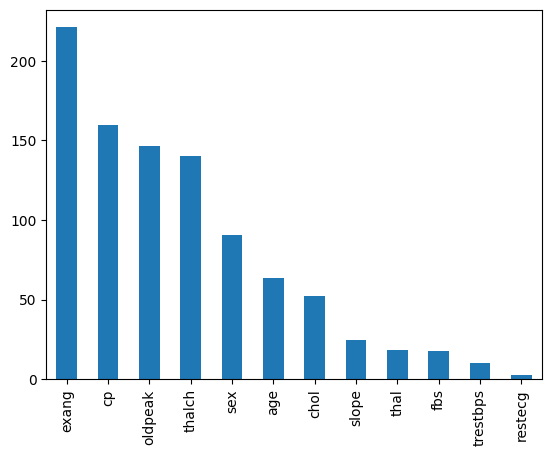

In [281]:
f_class=f_classif(features,targets)
pd.Series(f_class[0],index=features.columns).sort_values(ascending=False).plot(kind="bar")

In [282]:
new_fea=new_features[["exang","oldpeak","cp","thalch","age","sex","chol"]]

In [283]:
x_train,x_test,y_train,y_test=train_test_split(features,targets,test_size=0.2,random_state=2)

In [284]:
print(features.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(845, 12)
(676, 12)
(169, 12)
(676, 1)
(169, 1)


In [285]:
stands=StandardScaler()

In [286]:
new_features=pd.DataFrame(stands.fit_transform(features,targets),columns=features.columns)

<Axes: >

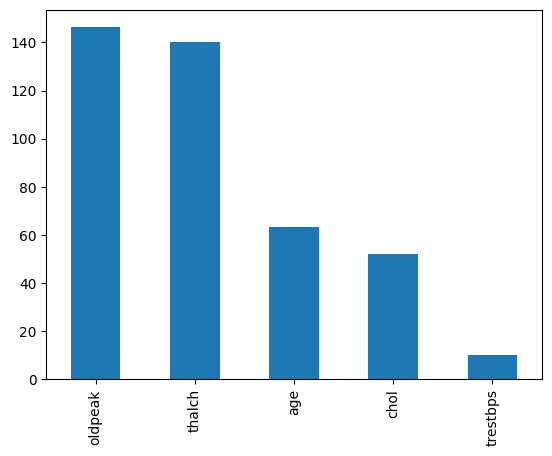

In [287]:
f_class=f_classif(features[["age","trestbps","chol","thalch","oldpeak"]],targets)
pd.Series(f_class[0],index=features[["age","trestbps","chol","thalch","oldpeak"]].columns).sort_values(ascending=False).plot(kind="bar")

In [322]:
descs=DecisionTreeClassifier(criterion="entropy",splitter="random",max_depth=6,min_samples_split=2)
descs.fit(x_train,y_train)
y_pred=descs.predict(x_test)
accuracy_score(y_test,y_pred)

0.8165680473372781

In [289]:
descs.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'random'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [290]:
y_pred=descs.predict(x_test)

In [291]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1])

In [292]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        79
           1       0.79      0.91      0.85        90

    accuracy                           0.82       169
   macro avg       0.83      0.82      0.82       169
weighted avg       0.83      0.82      0.82       169



In [293]:
print(confusion_matrix(y_test,y_pred))

[[57 22]
 [ 8 82]]


In [294]:
accuracy_score(y_test,y_pred)

0.8224852071005917

In [307]:
y_test_array = y_test.values.ravel() 
y_pred_proba = descs.predict_proba(x_test)[:, 1]
roc_auc=roc_auc_score(y_test,y_pred_proba,multi_class="ovr")
roc_auc

0.868706047819972

In [312]:
descs1=DecisionTreeClassifier(criterion="gini",splitter="random",max_depth=6,min_samples_split=2)
descs.fit(x_train,y_train)
y_pred=descs.predict(x_test)
accuracy_score(y_test,y_pred)

0.8224852071005917

In [313]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        79
           1       0.86      0.80      0.83        90

    accuracy                           0.82       169
   macro avg       0.82      0.82      0.82       169
weighted avg       0.82      0.82      0.82       169



In [317]:
print(confusion_matrix(y_test,y_pred))

[[67 12]
 [18 72]]


In [324]:
y_test_array = y_test.iloc[:, 0].values 
y_pred_proba = descs.predict_proba(x_test)[:, 1]
roc_auc=roc_auc_score(y_test,y_pred_proba,multi_class="ovr")
roc_auc

0.8635021097046414

In [325]:
params=[{"criterion":["entropy","gini"],"splitter":["random","best"],"max_depth":[5,10,15,20,25],"min_samples_split":[2,3,4,5,6]}]

In [326]:
grids=GridSearchCV(descs,params)

In [327]:
grids.fit(x_train,y_train)

,estimator,DecisionTreeC...tter='random')
,param_grid,"[{'criterion': ['entropy', 'gini'], 'max_depth': [5, 10, ...], 'min_samples_split': [2, 3, ...], 'splitter': ['random', 'best']}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [328]:
grids.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 6,
 'splitter': 'random'}

In [332]:
descs=DecisionTreeClassifier(criterion="gini",splitter="random",max_depth=5,min_samples_split=5)
descs.fit(x_train,y_train)
y_pred=descs.predict(x_test)
accuracy_score(y_test,y_pred)

0.8284023668639053

In [333]:
y_test_array = y_test.iloc[:, 0].values 
y_pred_proba = descs.predict_proba(x_test)[:, 1]
roc_auc=roc_auc_score(y_test,y_pred_proba,multi_class="ovr")
roc_auc

0.8604078762306611

[Text(0.615625, 0.9166666666666666, 'exang <= 0.747\ngini = 0.493\nsamples = 676\nvalue = [299, 377]\nclass = 1'),
 Text(0.36875, 0.75, 'cp <= 0.381\ngini = 0.466\nsamples = 406\nvalue = [256, 150]\nclass = 0'),
 Text(0.4921875, 0.8333333333333333, 'True  '),
 Text(0.2, 0.5833333333333334, 'thal <= 1.917\ngini = 0.47\nsamples = 146\nvalue = [55, 91]\nclass = 1'),
 Text(0.1, 0.4166666666666667, 'chol <= 107.565\ngini = 0.5\nsamples = 86\nvalue = [43, 43]\nclass = 0'),
 Text(0.05, 0.25, 'restecg <= 1.499\ngini = 0.227\nsamples = 23\nvalue = [3, 20]\nclass = 1'),
 Text(0.025, 0.08333333333333333, 'gini = 0.124\nsamples = 15\nvalue = [1, 14]\nclass = 1'),
 Text(0.075, 0.08333333333333333, 'gini = 0.375\nsamples = 8\nvalue = [2, 6]\nclass = 1'),
 Text(0.15, 0.25, 'thal <= 0.923\ngini = 0.464\nsamples = 63\nvalue = [40, 23]\nclass = 0'),
 Text(0.125, 0.08333333333333333, 'gini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]\nclass = 1'),
 Text(0.175, 0.08333333333333333, 'gini = 0.361\nsamples =

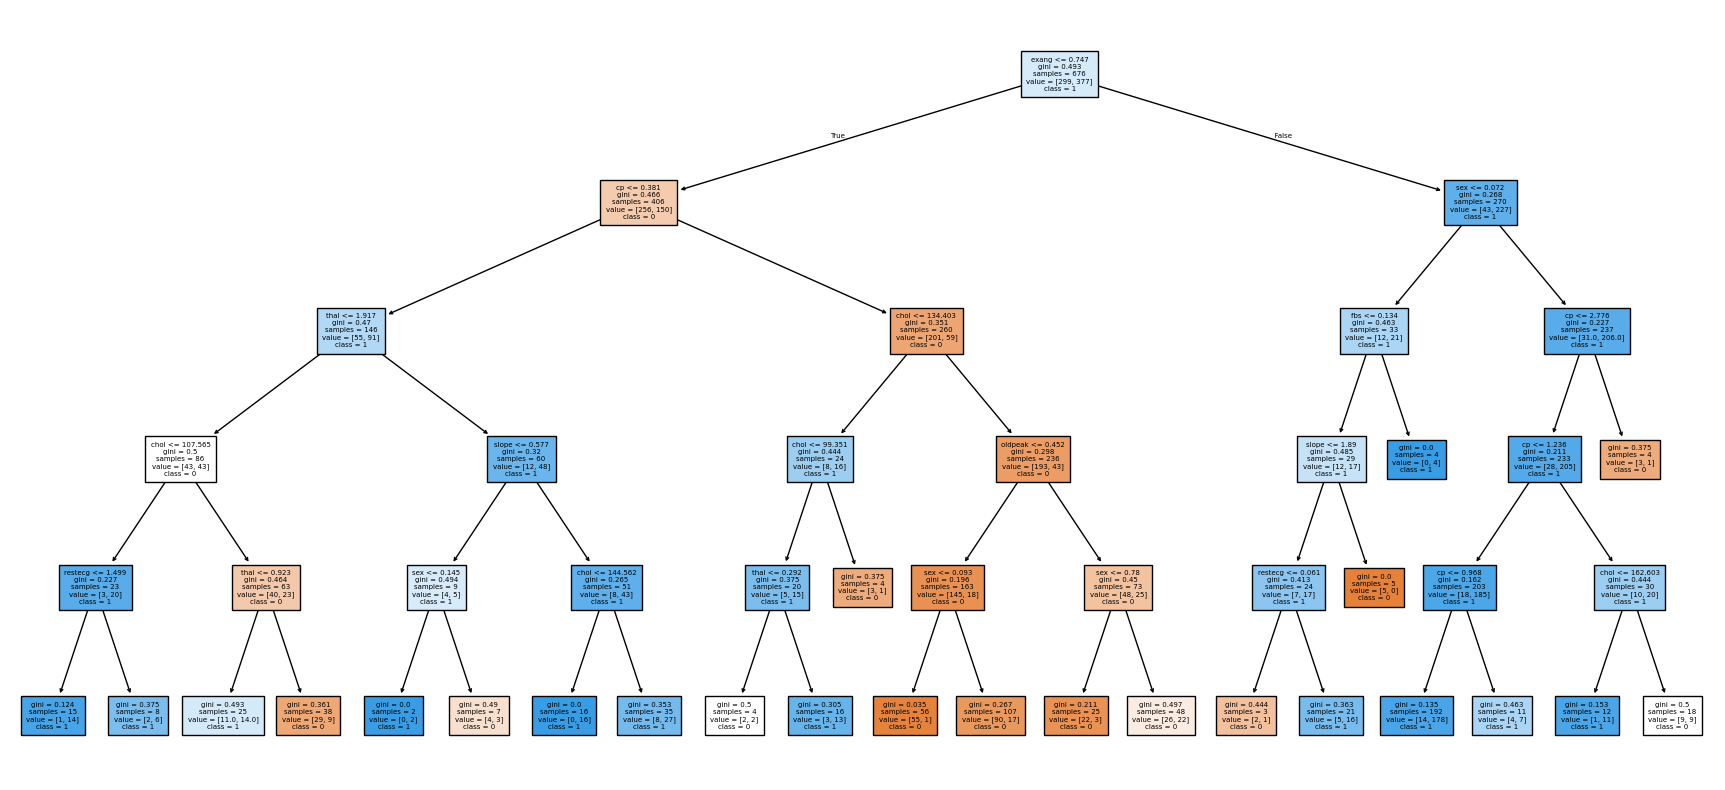

In [335]:
plt.figure(figsize=(22,10))
plot_tree(descs,feature_names=list(features),class_names=[str(cls) for cls in targets["num"].unique()],filled=True,fontsize=5)

From the root node and the biggest splits, the model is using the following most influential decision points early on
first_splits:
exang <= 0.138
This is the root node — meaning exercise-induced angina is the strongest predictor.
If exang is low → majority are classified into class 0.

Second-Level Key Splits:
On the left branch (exang ≤ 0.138):
sex <= 0.621
Sex is another strong predictor (likely 0 = female, 1 = male depending on encoding).
On the right branch (exang > 0.138):
cp <= 0.551
Chest pain type is the next major split — this also aligns with medical relevance.

important features learned by the model includes:
1.exang — root node
2.cp — early in the right branch
3.sex — early in left branch
4.oldpeak — multiple mid-level splits
5.chol — appears several times
6.age — used in high-level splits
7.slope — right-side branches

From the splits and thresholds shown:
* Patients without exercise-induced angina (exang low) are much more likely to be class 0

* Sex and chest pain type heavily influence prediction early

* Oldpeak, cholesterol, and age refine the classification deeper into the tree

* Slope, thalach (max heart rate), and thal contribute to more specific patterns

In [336]:
import pandas as pd

importances = pd.Series(descs.feature_importances_, index=x_train.columns)
importances.sort_values(ascending=False, inplace=True)
print(importances)


exang       0.432845
cp          0.224647
chol        0.144912
thal        0.060907
sex         0.056376
oldpeak     0.032624
slope       0.032554
restecg     0.007902
fbs         0.007233
age         0.000000
trestbps    0.000000
thalch      0.000000
dtype: float64


Top Predictive Features:
These features contribute the most to the decision-making in this Decision Tree:
1. exang = (0.38)
Exercise-induced angina is by far the strongest predictor — almost 38% of the model's decisions rely on this feature.
2. chol = (0.15)
Cholesterol level is the second most weighted feature.
3. age = (0.11)
Age also plays a significant role in classification.

Mid-Levels:
These features contribute somewhat but are less dominant:
1.oldpeak (0.096) — ST depression induced by exercise
2.sex (0.084) — Biological sex
3.cp (0.080) — Chest pain type
4.thalach (0.048) — Max heart rate achieved
5.slope (0.043) — Slope of ST segment

These features barely or never affect predictions in the current tree:
trestbps (0.013) — Resting blood pressure
fbs (0.00) — Fasting blood sugar
restecg (0.00) — Resting ECG
thal (0.00) — Thalassemia type